# Quick image hot take

Proof of Concept for B. Romans, on thin section analysis using Canny edge decetion & K-Means clustering.

# Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import skimage
from skimage import feature
from skimage import io # use the scikit-image data loader
from skimage.color import rgb2gray

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
%load_ext watermark
%watermark --iversions

numpy     : 1.21.5
sys       : 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) 
[Clang 13.0.1 ]
skimage   : 0.19.3
matplotlib: 3.5.2
seaborn   : 0.12.0



# Loading in Data

In [3]:
img = io.imread('image.png')

We need to check the shape. Some png's have Red, Green, Blue, Alpha (transpareny). We need to get rid of transparency!

In [4]:
np.shape(img)

(943, 1119, 4)

Will only index the first 3 channels, double check it looks the same.

(943, 1119, 3)


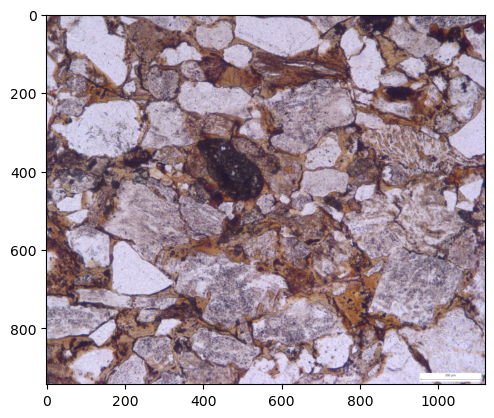

In [5]:
print(np.shape(img[:, :, :3]))
plt.imshow(img[:, :, :3])

Canny only works on greyscale, luckily scikit image has a nice function to do just that:

In [6]:
grayscale = rgb2gray(img[:, :, :3])

Canny Edge Dection has a few different parameters, worth looping through them or trying a few before launching into your whole dataset.

This is the link to the documentation:

https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=canny#skimage.feature.canny

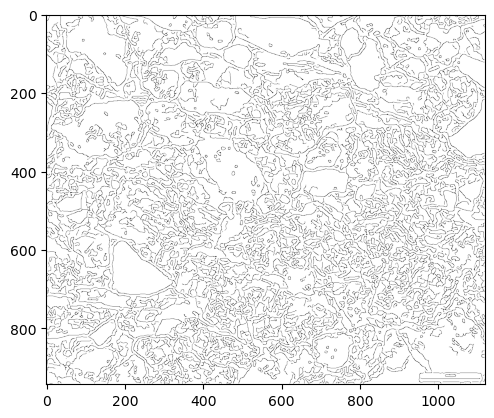

In [7]:
edges25 = feature.canny(grayscale, sigma=2.15, low_threshold=.0005) # mess around with it here
plt.imshow(edges25, cmap='Greys')

### Let's calculate 4 images with different sigma values

In [8]:
edges2 = feature.canny(grayscale, sigma=2)
edges3 = feature.canny(grayscale, sigma=3)
edges4 = feature.canny(grayscale, sigma=4)
edges5 = feature.canny(grayscale, sigma=5)

Plot the results:

Text(0.5, 1.0, 'Sigma 5')

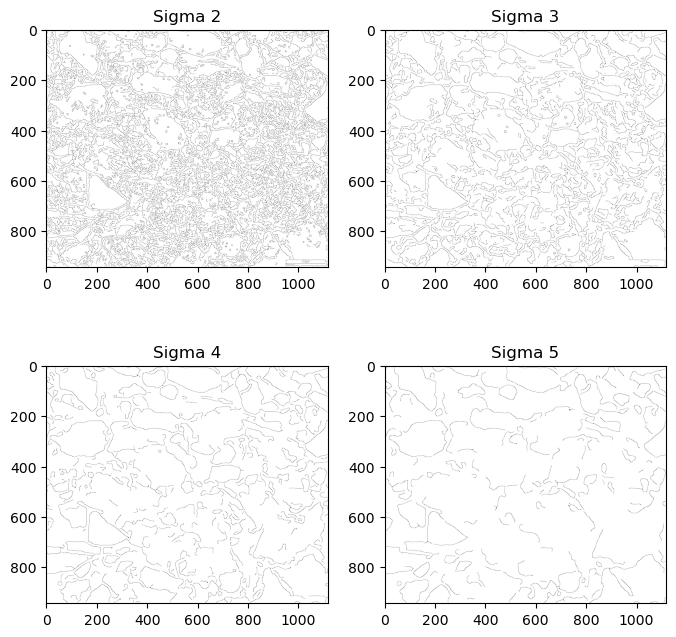

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].imshow(edges2, cmap='Greys')
axs[0, 0].set_title('Sigma 2')


axs[0, 1].imshow(edges3, cmap='Greys')
axs[0, 1].set_title('Sigma 3')

axs[1, 0].imshow(edges4, cmap='Greys')
axs[1, 0].set_title('Sigma 4')

axs[1, 1].imshow(edges5, cmap='Greys')
axs[1, 1].set_title('Sigma 5')

# KMeans Clustering

Compared to Canny edge detection, this works by classiflying every pixel by itself 

In [10]:
n = 4 # number of clusters
image_gray = grayscale # 

0


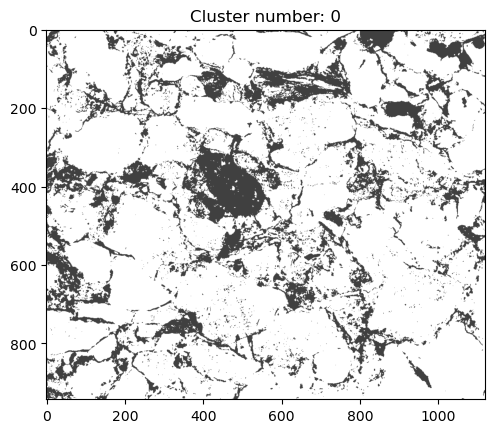

1


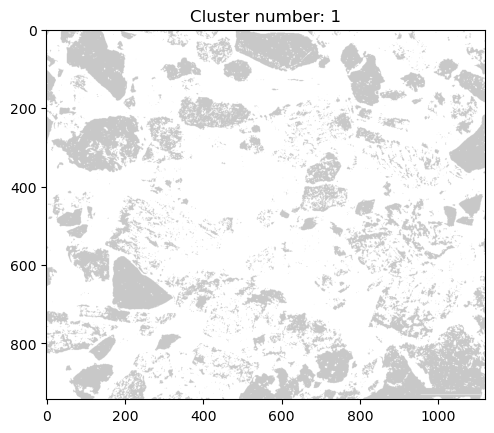

2


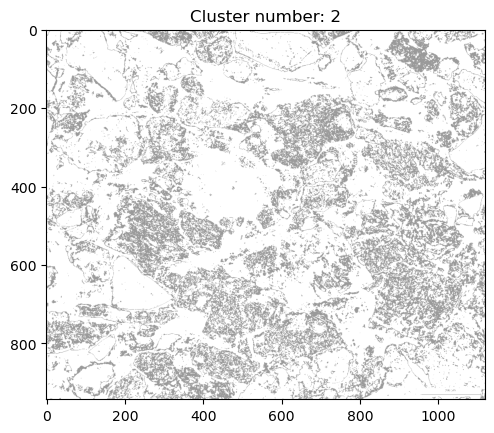

3


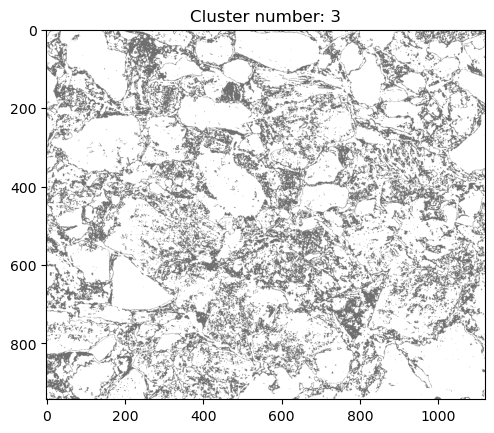

In [11]:
fig.tight_layout()
plt.show()
image_gray= grayscale.reshape(grayscale.shape[0] * grayscale.shape[1], 1)
image_gray.shape

kmeans = KMeans(n_clusters=n, random_state=0).fit(image_gray)
clustered = kmeans.cluster_centers_[kmeans.labels_]
labels = kmeans.labels_

for n in range(n):
    image_cluster = []
    for i in range(len(labels)):
        if(labels[i]) == n:
            image_cluster.append(float(clustered[i]))
        else:
            image_cluster.append(1)
    if(n==1):
        image_fix= np.array(image_cluster).reshape(grayscale.shape)
    reshape_clustered = np.array(image_cluster).reshape(grayscale.shape)
    plt.imshow(reshape_clustered, cmap=plt.get_cmap("gray"),vmin=0, vmax=1)
    print(n)
    title = f"Cluster number: {n}"
    plt.title(title)
    plt.show()

## Future Work

1. Experiment with pre-processing of the above. Different filters, converting to HSV, processing the outputs, making a heatmap of stacked images, etc.
2. Compare different clustering schemes, and different number of clusters would be a natural place to go with the above.
3. Various ML based approaches! Would want some labled examples

Two packages that might help:

Shapely: https://github.com/shapely/shapely

GeoPandas: https://geopandas.org/en/stable/